# WHO national life expectancy analysis and prediction

## About the dataset

## EDA
----
### Basic analysis
- **target feature** : "une_life" (from Unicef), "life_expect" (from WHO) and why not "life_expect60" (from WHO). We can build a model for both sources and compare results.

- **nb columns/rows** : 32 columns / 3111 rows

- **columns types** : 28 floats, 3 objects/category-like, 1 int ('year' col => may need casting).
Float types cols are mainly rates per n-pop or percentages.

- **missing values** : 
    - "hospitals" has 95% missing data => non usable.
    - top missing values : hospitals (95%), pop education indicator cols from Unicef (school: 74%, edu_spend: 41%, literacy: 81%, poverty: 70%)
    - perfect correlation between vaccinations data (measles, polio and diphtheria). When 1 of those is missing, so are the others.
    - vacc data tends to miss when "basic_water" is missing (0.8 corr).
    - when "alcohol" value is missing, some pop health values too : vacc data (0.6), pop body shape (0.7)
  
I decided to get rid of cols where at least 80% of values are missing

### In-depth analysis
- **target distribution**: an outlier for Haiti (2010 seism)

## Hypothesis / Intuitions / Ideas
----

### Categorize each feature in an indicator class

I believe that each column can be categorized in indicators :
- **Mortality figures**
- **Politics** : governments actions, funds
- **Population Health** : 
    - health coverage : vaccinations, hospitals, doctors 
    - pop perks : basic_water, alcohol
    - body's shape : bmi, age5-19thinness, age5-19obesity
- **Social** : education budgets, schools, poverty
- **Countries** : country, country_code, region

That doesn't necessarily mean that we should explicitly do a classification work on the dataset. 
But for the analysis, we could identify those indicators and visualize their relations.

### Relations between indicators

The general idea would be to observe any correlation inside and between indicators.

1. Check correlations between mortality and the target.
2. Check correlations between pop health and the target.
3. Check correlations between mortality and pop health indicators first, then others indicators.
4. Check correlations between pop health and evey other indicators.

**Hypothesis** : "Population health explains significantly mortality rates and thus gives a good idea of a country's life expectancy".
In other words, good pop health means low mortality rates and a high life expectancy.

- Associated columns : ...
- Visualize the evolution of the target with the evolution of pop health over the years
- Polio is mainly an infantile disease (< 5y olds) : check correlation between infantile death rate and polio vaccination rate
- Do the same for every other diseases in the dataset

### Comparing coutries
- Plot maps with different indicators as the hue.
- Profile coutries from their global pop health.

## Pre-processing

## Feature selection

## Model selection

## Final thoughts

- This dataset doesn't provide any data about political conflicts or wars => can affect gradually a country/region life expectancy
- The ML model is very sensible to very deadly natural disasters => like 2010 Haiti seism outlier (min value)

## Librairies

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
from plotly.subplots import make_subplots
import missingno as msno

## Import dataset

In [3]:
df = pd.read_csv('who_life_exp.csv')
df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


### Shape analysis

In [4]:
df.shape

(3111, 32)

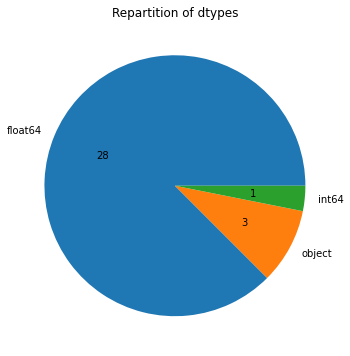

In [5]:
df_dtypes = df.dtypes.value_counts()

plt.figure(figsize=(6, 6))
ax = df_dtypes.plot.pie(
    y=df_dtypes.index,
    label="",
    title="Repartition of dtypes",
    autopct=lambda x: '{:.0f}'.format(x*df_dtypes.sum()/100)
)

### Missing values

In [6]:
per_missing = df.isna().sum() / df.shape[0]
per_missing.sort_values(ascending=False)

hospitals          0.958213
une_literacy       0.816458
une_school         0.741241
une_poverty        0.706525
doctors            0.427837
une_edu_spend      0.413372
une_hiv            0.238187
gni_capita         0.219222
hepatitis          0.182899
une_gni            0.037608
che_gdp            0.037608
gghe-d             0.032144
alcohol            0.016072
une_pop            0.011893
age5-19obesity     0.010929
age5-19thinness    0.010929
bmi                0.010929
basic_water        0.010286
diphtheria         0.006107
polio              0.006107
measles            0.006107
country_code       0.000000
age1-4mort         0.000000
infant_mort        0.000000
une_infant         0.000000
une_life           0.000000
adult_mortality    0.000000
life_exp60         0.000000
life_expect        0.000000
year               0.000000
region             0.000000
country            0.000000
dtype: float64

<AxesSubplot:>

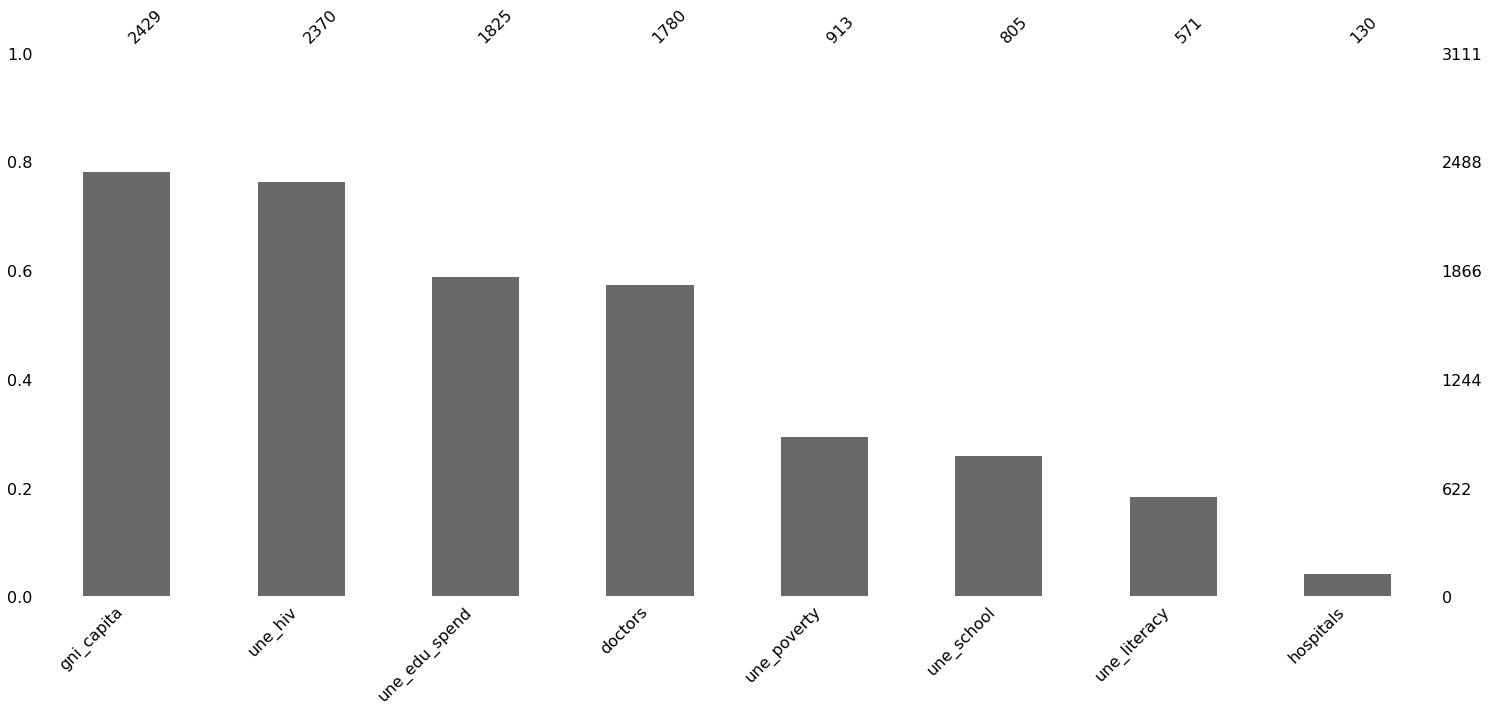

In [7]:
# Observe cols where with at least 20% missing values
per_miss_20 = df[df.columns[per_missing > 0.2]]
msno.bar(
    per_miss_20, 
    sort='descending'
)

C:\Users\clemd\AppData\Local\Temp\ipykernel_16196\2140922669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  per_miss_20['region'] = df['region']


<AxesSubplot:title={'center':'Proportion of non missing values per region'}, xlabel='region'>

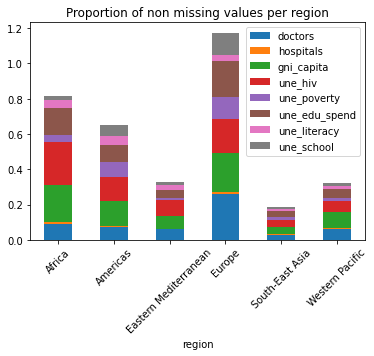

In [54]:
# Observe missing data proportion per region
per_miss_20['region'] = df['region']
non_miss_region = per_miss_20.groupby(['region']).count().reset_index()

numeric_cols = non_miss_region.select_dtypes("int64").columns
non_miss_region[numeric_cols] = non_miss_region[numeric_cols].apply(lambda x: (x / per_miss_20.shape[0]), axis=1)

non_miss_region.plot.bar(
    title="Proportion of non missing values per region",
    x='region', 
    stacked=True, 
    rot=45)

In [41]:
df_hospitals = df[df['hospitals'].notna()].groupby(['year']).count()
df_hospitals

,country,country_code,region,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
year,,,,,,,,,,,,,,,,,,,,,
2013,129,129,129,129,129,129,129,129,129,128,...,125,127,129,129,104,126,37,80,24,37
2014,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,0


<AxesSubplot:>

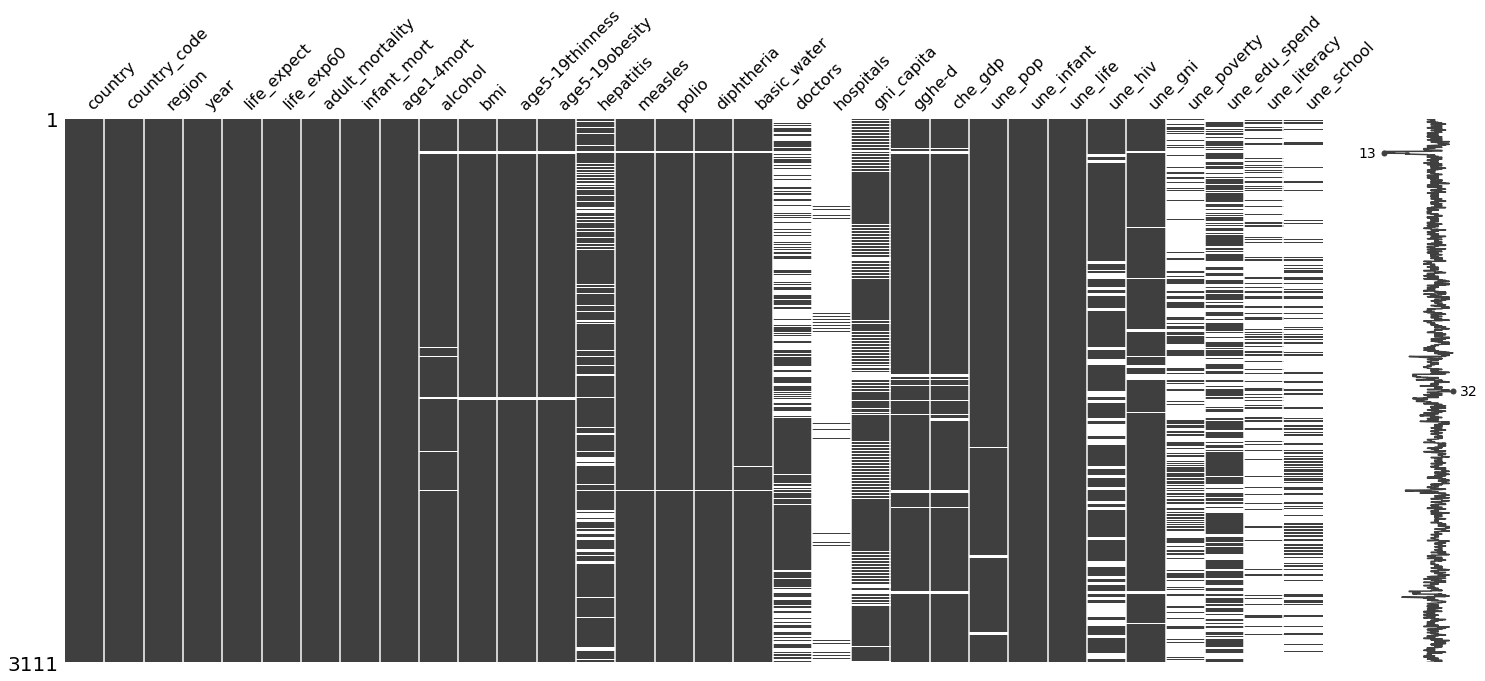

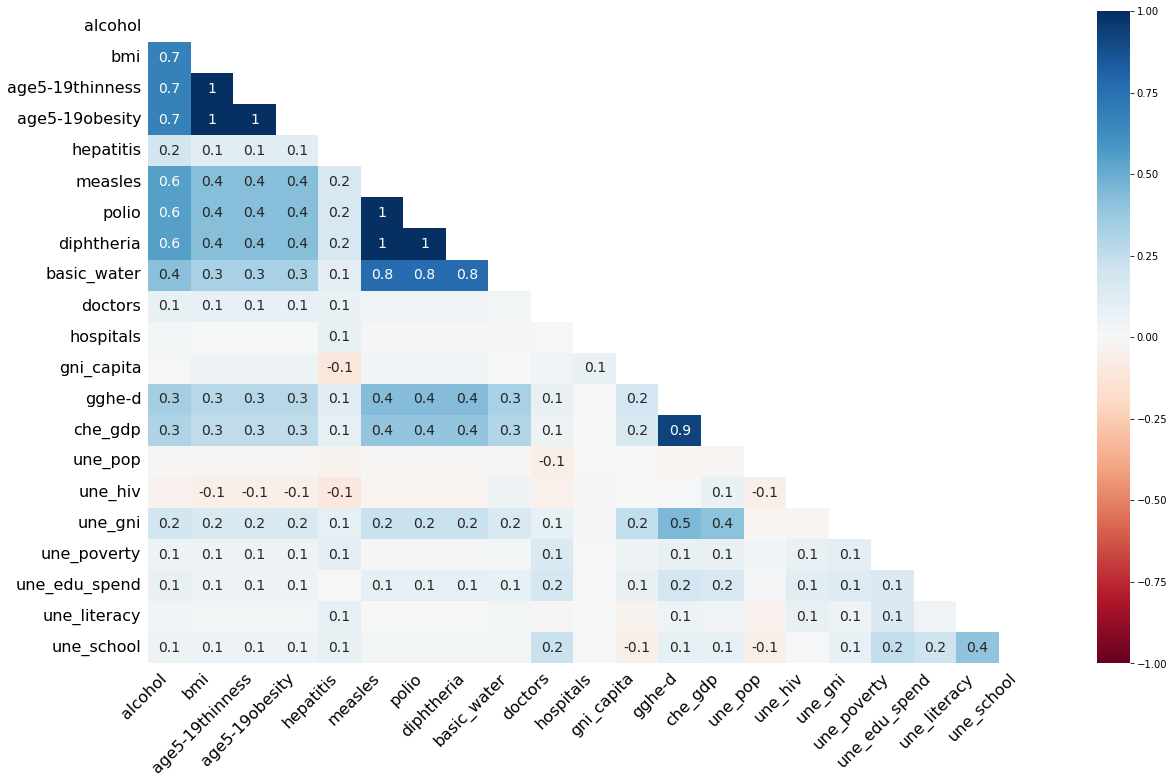

In [8]:
# General view of missing values on the entire dataset
msno.matrix(df)
msno.heatmap(df)

## Numerical analysis

In [116]:
df_clean = df[df.columns[per_missing < 0.8]]
df_clean.describe()

,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,...,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_school
count,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3061.000000,3077.000000,3077.000000,3077.000000,...,3011.000000,2994.000000,3.074000e+03,3111.000000,3111.000000,2370.000000,2994.000000,913.000000,1825.00000,805.000000
mean,2008.000000,69.146384,18.912060,193.527786,0.032496,0.003489,4.834781,25.052714,5.312447,5.972278,...,3.122935,6.110353,3.707550e+04,30.488428,68.957352,2.038397,14964.832999,10.845893,4.53293,9.712214
std,4.899767,9.129761,2.885412,114.007447,0.030361,0.005146,3.998741,2.193445,4.652408,4.530812,...,2.091720,2.505267,1.378377e+05,27.756930,9.359194,4.593804,17495.137508,17.168798,1.75428,2.854723
min,2000.000000,36.227360,10.728000,49.201850,0.001470,0.000065,0.000000,19.800000,0.100000,0.100000,...,0.062360,1.025160,7.601600e+01,1.600000,39.441000,0.100000,420.000000,0.100000,0.78744,0.559340
25%,2004.000000,63.200095,16.619485,108.269750,0.008255,0.000355,1.198030,23.300000,1.800000,2.000000,...,1.533445,4.238798,2.195105e+03,8.000000,62.844500,0.100000,2970.000000,0.600000,3.26283,7.735940
50%,2008.000000,71.597200,18.508260,164.822200,0.019995,0.000895,3.993560,25.500000,3.800000,5.200000,...,2.601300,5.758030,8.544297e+03,19.500000,71.409000,0.400000,8340.000000,3.100000,4.42541,10.270400
75%,2012.000000,75.537030,21.099175,250.832300,0.051720,0.004877,7.723420,26.500000,7.800000,8.900000,...,4.278110,7.850327,2.509552e+04,48.050000,75.570645,1.500000,20482.500000,12.400000,5.49498,12.070610
max,2016.000000,84.166160,26.394020,696.874200,0.164515,0.039095,20.182460,32.200000,28.100000,26.700000,...,12.062730,20.413410,1.414049e+06,142.400000,83.984880,28.200000,122670.000000,94.100000,14.05908,14.378800


### Target distribution

In [167]:

# Target distribution per region

for t in ['life_expect', 'life_exp60']:
    fig = px.violin(df_clean,
        title=f'Distribution of {t} per region',
        y = t,
        x = 'region',
        color=df_clean['region'],
        points='all',
        box=True
    )
    fig.show()


In [78]:
# Look at outliers
df_clean[df_clean['life_expect'] == df_clean['life_expect'].min()]

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_school
1166,Haiti,HTI,Americas,2010,36.22736,10.728,682.5308,0.077865,0.0211,2.31526,...,1.45539,8.1456,9949.322,85.6,60.511,2.1,1480.0,NaN,NaN,NaN


### Mortality rates correlations

In [170]:
# Observing target distribution
px.scatter(
    df_clean, 
    y='adult_mortality', 
    x='life_expect', 
    color='region', 
    facet_col='year', facet_col_wrap=6)

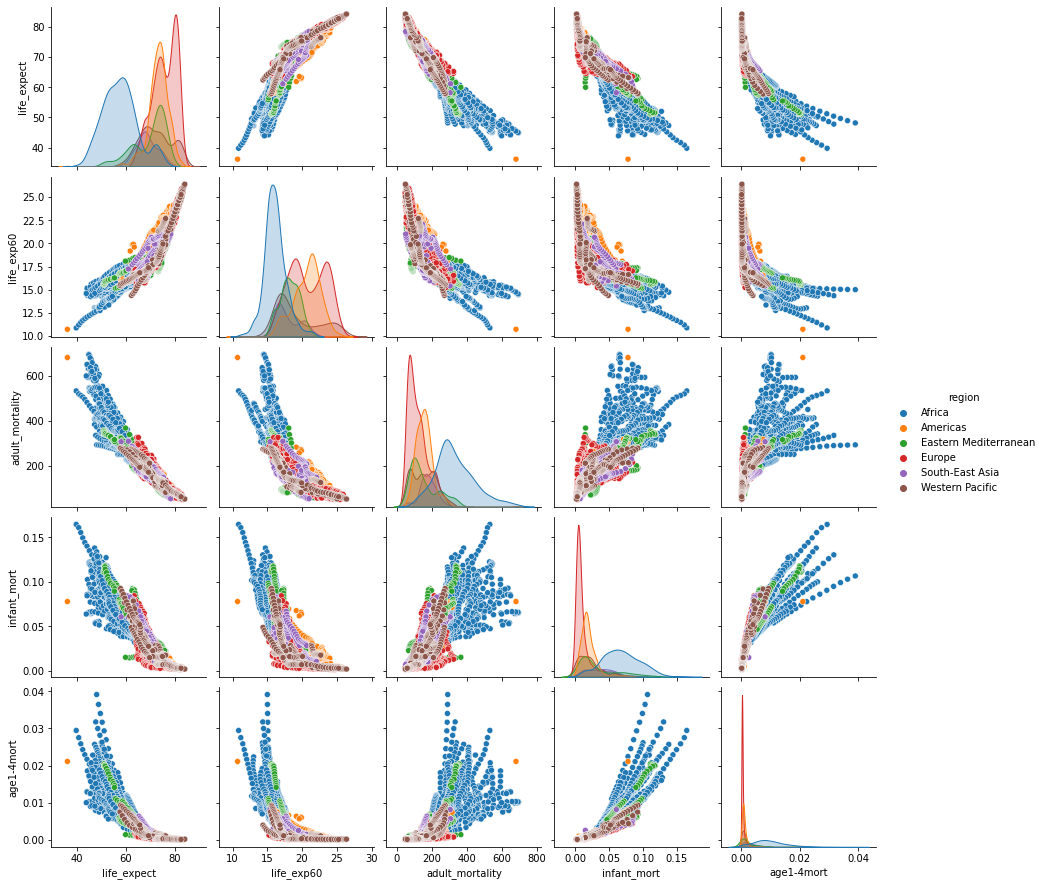

In [178]:
mortality_rates = df[['region', 'life_expect', 'life_exp60', 'adult_mortality', 'infant_mort', 'age1-4mort']]
sns.pairplot(mortality_rates, hue='region')

<AxesSubplot:>

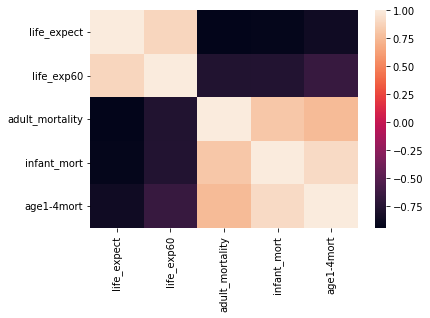

In [179]:
sns.heatmap(mortality_rates.corr())